In [1]:
from datasets import load_dataset

In [2]:
ds_python_filter = load_dataset('bigcode/stack-pjjs-pii-filtered-smol', data_dir="data/python", split="train", use_auth_token=True)
ds_java_filter = load_dataset('bigcode/stack-pjjs-pii-filtered-smol', data_dir="data/java", split="train", use_auth_token=True)
ds_js_filter = load_dataset('bigcode/stack-pjjs-pii-filtered-smol', data_dir="data/javascript", split="train", use_auth_token=True)

Using custom data configuration bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03
Found cached dataset json (/Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58
Found cached dataset json (/Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990
Found cached dataset json (/Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)


In [3]:
ds_python_filter

Dataset({
    features: ['hexsha', 'size', 'ext', 'lang', 'max_stars_repo_path', 'max_stars_repo_name', 'max_stars_repo_head_hexsha', 'max_stars_repo_licenses', 'max_stars_count', 'max_stars_repo_stars_event_min_datetime', 'max_stars_repo_stars_event_max_datetime', 'max_issues_repo_path', 'max_issues_repo_name', 'max_issues_repo_head_hexsha', 'max_issues_repo_licenses', 'max_issues_count', 'max_issues_repo_issues_event_min_datetime', 'max_issues_repo_issues_event_max_datetime', 'max_forks_repo_path', 'max_forks_repo_name', 'max_forks_repo_head_hexsha', 'max_forks_repo_licenses', 'max_forks_count', 'max_forks_repo_forks_event_min_datetime', 'max_forks_repo_forks_event_max_datetime', 'avg_line_length', 'max_line_length', 'alphanum_fraction', 'index', 'content'],
    num_rows: 10000
})

In [6]:
def convert_none_stars(examples):
    stars = []
    for value in examples['max_stars_count']:
        if value is None:
            stars.append(0)
        else:
            stars.append(value)
    return {'stars': stars}

In [7]:
ds_stars_py = ds_python_filter.map(convert_none_stars, batched=True, batch_size=1000)
ds_stars_java = ds_java_filter.map(convert_none_stars, batched=True, batch_size=1000)
ds_stars_js = ds_js_filter.map(convert_none_stars, batched=True, batch_size=1000)

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

In [23]:
# get mean median and percentiles of nl_size
import numpy as np

print(f"Mean comment size: {np.mean(ds_stars_py['stars']):.2f}")
print(f"Median comment size: {np.median(ds_stars_py['stars']):.2f}")
percents = np.percentile(ds_stars_py['stars'], [20, 50, 60, 70, 75, 95, 99]).astype(int)
print(f"percentile 20th: {percents[0]}")
print(f"percentile 50th: {percents[1]}")
print(f"percentile 60th: {percents[2]}")
print(f"percentile 70th: {percents[3]}")
print(f"percentile 75th: {percents[4]}")
print(f"percentile 95th: {percents[5]}")
print(f"percentile 99th: {percents[6]}")

Mean comment size: 319.60
Median comment size: 1.00
percentile 20th: 0
percentile 50th: 1
percentile 60th: 2
percentile 70th: 5
percentile 75th: 9
percentile 95th: 471
percentile 99th: 6139


In [78]:
# percentage files with zero stars
zero = ds_stars_py.filter(lambda x: x['stars'] == 0)
three = ds_stars_py.filter(lambda x: x['stars'] <= 3)
five = ds_stars_py.filter(lambda x: x['stars'] <= 5)
ten = ds_stars_py.filter(lambda x: x['stars'] <= 10)
fifteen = ds_stars_py.filter(lambda x: x['stars'] <= 15)
print(f"percentage files with zero stars: {len(zero) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than three stars: {len(three) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than five stars: {len(five) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than ten stars: {len(ten) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than fifteen stars: {len(fifteen) * 100/ len(ds_stars_py):.2f}%")

Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-973f31318b0c48cb.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-580a7359407d6cce.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-b91ee399dceede0d.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache

percentage files with zero stars: 41.33%
percentage files with less than three stars: 65.80%
percentage files with less than five stars: 70.40%
percentage files with less than ten stars: 76.15%
percentage files with less than fifteen stars: 79.45%


In [61]:
# let's get volume of data removed
def get_size_nl(example):
    size = len(example["content"])
    return {"size": size}

In [79]:
ds_py_w_size = ds_python_filter.map(get_size_nl)
zero_w_size = zero.map(get_size_nl)
three_w_size = three.map(get_size_nl)
five_w_size = five.map(get_size_nl)
ten_w_size = ten.map(get_size_nl)
fifteen_w_size = fifteen.map(get_size_nl)

Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-4dd0d520e9034856.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-e4c8250e19c2c076.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-b5fda0c16b26b27f.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-6782f925a3950d03/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache

In [80]:
old_size_gb = sum(ds_py_w_size["size"])
new_size_zero = sum(zero_w_size["size"])
new_size_three = sum(three_w_size["size"])
new_size_five = sum(five_w_size["size"])
new_size_ten = sum(ten_w_size["size"])
new_size_fifteen = sum(fifteen_w_size["size"])

print(f"percentage of volume removed with filter 0 stars: {new_size_zero * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 3 stars: {new_size_three * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 5 stars: {new_size_five * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 10 stars: {new_size_ten * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 15 stars: {new_size_fifteen * 100 / old_size_gb:.2f}%")

percentage of volume removed with filter 0 stars: 33.93%
percentage of volume removed with filter 3 stars: 57.65%
percentage of volume removed with filter 5 stars: 63.20%
percentage of volume removed with filter 10 stars: 69.95%
percentage of volume removed with filter 15 stars: 73.16%


## Conclusion - Python

* 41% of the files have zero stars (33% of volume)
* any filter for more than 3 stars will remove at least 65% of the data (57% of volume)
* if we want a filter for more than 3 stars, we might as well go for 5 or 10 stars, the latter 76% of the data (70% of volume) 

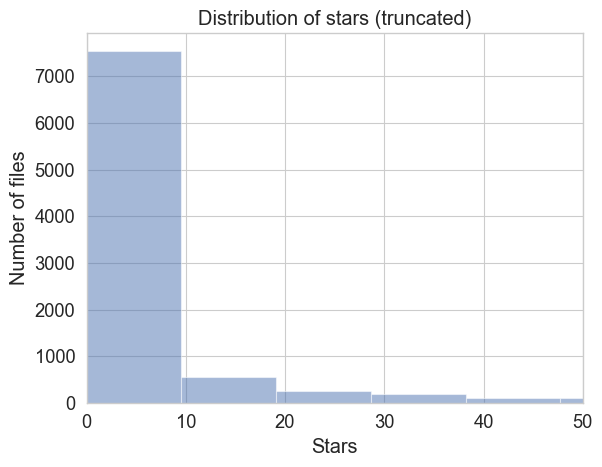

In [53]:
import matplotlib.pyplot as plt

plt.hist(ds_stars_py['stars'], bins=20000, alpha=0.5, label='python')
plt.title("Distribution of stars (truncated)")
plt.xlabel("Stars")
plt.xlim(0, 50)
plt.ylabel("Number of files")
plt.show()

## Java

In [81]:
# percentage files with zero stars
zero = ds_stars_java.filter(lambda x: x['stars'] == 0)
three = ds_stars_java.filter(lambda x: x['stars'] <= 3)
five = ds_stars_java.filter(lambda x: x['stars'] <= 5)
ten = ds_stars_java.filter(lambda x: x['stars'] <= 10)
fifteen = ds_stars_java.filter(lambda x: x['stars'] <= 15)
print(f"percentage files with zero stars: {len(zero) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than three stars: {len(three) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than five stars: {len(five) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than ten stars: {len(ten) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than fifteen stars: {len(fifteen) * 100/ len(ds_stars_py):.2f}%")

Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-7831d7c0e437b0f5.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-5b0965d1c200dd93.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-e6164b6127cb1be7.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache

percentage files with zero stars: 44.59%
percentage files with less than three stars: 69.39%
percentage files with less than five stars: 73.72%
percentage files with less than ten stars: 78.16%
percentage files with less than fifteen stars: 80.90%


In [82]:
ds_java_w_size = ds_stars_java.map(get_size_nl)
zero_w_size = zero.map(get_size_nl)
three_w_size = three.map(get_size_nl)
five_w_size = five.map(get_size_nl)
ten_w_size = ten.map(get_size_nl)
fifteen_w_size = fifteen.map(get_size_nl)

Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-2871e46ccbf7b988.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-12c3225401b958ad.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-48486a8e133b27eb.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-daa80c903c8b7f58/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache

In [83]:
old_size_gb = sum(ds_java_w_size["size"])
new_size_zero = sum(zero_w_size["size"])
new_size_three = sum(three_w_size["size"])
new_size_five = sum(five_w_size["size"])
new_size_ten = sum(ten_w_size["size"])
new_size_fifteen = sum(fifteen_w_size["size"])

print(f"percentage of volume removed with filter 0 stars: {new_size_zero * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 3 stars: {new_size_three * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 5 stars: {new_size_five * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 10 stars: {new_size_ten * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 15 stars: {new_size_fifteen * 100 / old_size_gb:.2f}%")

percentage of volume removed with filter 0 stars: 40.80%
percentage of volume removed with filter 3 stars: 65.61%
percentage of volume removed with filter 5 stars: 69.33%
percentage of volume removed with filter 10 stars: 73.53%
percentage of volume removed with filter 15 stars: 76.78%


## Javascript

In [84]:
# percentage files with zero stars
zero = ds_stars_js.filter(lambda x: x['stars'] == 0)
three = ds_stars_js.filter(lambda x: x['stars'] <= 3)
five = ds_stars_js.filter(lambda x: x['stars'] <= 5)
ten = ds_stars_js.filter(lambda x: x['stars'] <= 10)
fifteen = ds_stars_js.filter(lambda x: x['stars'] <= 15)
print(f"percentage files with zero stars: {len(zero) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than three stars: {len(three) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than five stars: {len(five) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than ten stars: {len(ten) * 100/ len(ds_stars_py):.2f}%")
print(f"percentage files with less than fifteen stars: {len(fifteen) * 100/ len(ds_stars_py):.2f}%")

Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-bd19758f138328be.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-16aee229995ec052.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-3576234af5a5a290.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache

percentage files with zero stars: 50.87%
percentage files with less than three stars: 74.33%
percentage files with less than five stars: 77.92%
percentage files with less than ten stars: 82.52%
percentage files with less than fifteen stars: 84.72%


In [85]:
ds_js_w_size = ds_js_filter.map(get_size_nl)
zero_w_size = zero.map(get_size_nl)
three_w_size = three.map(get_size_nl)
five_w_size = five.map(get_size_nl)
ten_w_size = ten.map(get_size_nl)
fifteen_w_size = fifteen.map(get_size_nl)

  0%|          | 0/10000 [00:00<?, ?ex/s]

Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-11763be5dcd1437a.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-92e116b646e805a3.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache-fece285fa0fe1bcf.arrow
Loading cached processed dataset at /Users/loubnabenallal/.cache/huggingface/datasets/bigcode___json/bigcode--stack-pjjs-pii-filtered-smol-5322d73266feb990/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab/cache

In [86]:
old_size_gb = sum(ds_js_w_size["size"])
new_size_zero = sum(zero_w_size["size"])
new_size_three = sum(three_w_size["size"])
new_size_five = sum(five_w_size["size"])
new_size_ten = sum(ten_w_size["size"])
new_size_fifteen = sum(fifteen_w_size["size"])

print(f"percentage of volume removed with filter 0 stars: {new_size_zero * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 3 stars: {new_size_three * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 5 stars: {new_size_five * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 10 stars: {new_size_ten * 100 / old_size_gb:.2f}%")
print(f"percentage of volume removed with filter 15 stars: {new_size_fifteen * 100 / old_size_gb:.2f}%")

percentage of volume removed with filter 0 stars: 48.69%
percentage of volume removed with filter 3 stars: 69.60%
percentage of volume removed with filter 5 stars: 73.12%
percentage of volume removed with filter 10 stars: 76.65%
percentage of volume removed with filter 15 stars: 78.56%


## Conclusion
* for all languages ~40% of the files (and volume) have 0 stars

* a threshold of 3 stars would remove:
    * 65% of the files for python (57% volume)
    * 69% of the files for java (65% volume)
    * 74% of the files for javascript (69% volume)

* a threshold of 5 stars would remove:
    * 70% of the files for python (63% volume)
    * 74% of the files for java (70% volume)
    * 78% of the files for javascript (73% volume)

* a threshold of 10 stars would remove:
    * 76% of the files for python (70% volume)
    * 78% of the files for java (73% volume)
    * 82% of the files for javascript (76% volume)

